In [ ]:
#!pip install sb3-contrib

In [62]:
from sb3_contrib import MaskablePPO

In [63]:
from torch.distributions import Distribution

In [64]:
from apad_puzzle_rl.envs.apad_env import APADEnv

Distribution.set_default_validate_args(False)

In [65]:
model = MaskablePPO.load("notebooks/curriculum_model_lvl7")

In [66]:
env = APADEnv(4, 14, mask_islands=False)
obs, _ = env.reset()

In [67]:
obs, info = env.reset()

In [57]:
obs, info = env.reset()
obs, reward, terminated, truncated, info = env.step(2412)
obs, reward, terminated, truncated, info = env.step(1918)
obs, reward, terminated, truncated, info = env.step(688)
obs, reward, terminated, truncated, info = env.step(216)
# obs, reward, terminated, truncated, info = env.step(1060)
# obs, reward, terminated, truncated, info = env.step(666)
# obs, reward, terminated, truncated, info = env.step(53)
mask = info["action_mask"]
# print(np.flatnonzero(mask).size)
# env.visualize()

In [68]:
actions = []

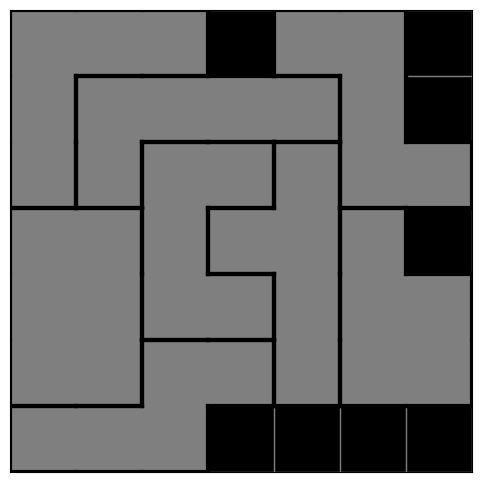

2412 1918 704 2373 1161 508 103 1397


In [76]:
action, _ = model.predict(obs, action_masks=info["action_mask"], deterministic=False)
actions.append(action)
obs, reward, terminated, truncated, info = env.step(action)
env.visualize()
print(*actions)
if truncated:
    obs, info = env.reset()
    actions.clear()

In [ ]:
def test_complete_game(model, env, verbose=False):
    obs, info = env.reset()
    total_reward = 0
    step_count = 0

    # action_masks = env.action_masks()

    while True:
        # if not np.any(action_masks):
        #    print(f"No valid actions at step {step_count}")
        #    break

        action, _ = model.predict(obs, action_masks=env.action_masks(), deterministic=False)

        # if not action_masks[action]:
        #    print(f"Invalid action {action}")
        #    valid_actions = np.where(action_masks)[0]
        #    action = np.random.choice(valid_actions)

        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        step_count += 1

        if verbose:
            print(f"Step {step_count}: Action {action}, Reward {reward}, Total {total_reward}")

        if done or truncated:
            if verbose:
                print(f"Game ended: {'Win' if done else 'Loss'}")
            break

    if verbose:
        print(f"Final score: {total_reward}, Steps: {step_count}")
    return total_reward, step_count

### play until we win

In [ ]:
total_rewared = 0
step_count = 0
i = 0
while step_count < 7:
    i += 1
    if i % 100 == 0:
        print(i)
    env = APADEnv(-1, -1, 1)
    total_reward, step_count = test_complete_game(model, env)
env.visualize()

### win rate

In [ ]:
total_rewared = 0
step_count = 0
win = 0
for i in range(0, 99):
    total_reward, step_count = test_complete_game(model, env)
    if step_count == 8:
        win += 1
    if i % 10 == 0:
        print(i)
print(f"success rate: {win/99.:.2f}")

In [ ]:
def evaluate_win_rate(model, env, n_episodes=100):
    wins = 0
    for i in range(n_episodes):
        if i % 10 == 0:
            print(i)
        obs, info = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=False, action_masks=info["action_mask"])
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        wins += terminated  # reward>0 and terminated ⇔ win in this env
    return wins / n_episodes

In [ ]:
evaluate_win_rate(model, env)